In [1]:
from imageGAN import *
import matplotlib.pyplot as plt
import numpy
import os
from dataset_helper import *

In [2]:
dim = (256,256,3)
batchsize=64
epochs = 10
latentDim = 100
stride = 2
arch = [32,32,16,16,8]
arch_desc = [16,32,64,32,32]

gen = Generator(dim,arch,latent_size=latentDim,stride=stride)
des = Discriminator(dim,arch_desc,stride=2)

Model: "generator"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100)]             0         
_________________________________________________________________
dense (Dense)                (None, 2048)              206848    
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 2048)              0         
_________________________________________________________________
reshape (Reshape)            (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 16, 16, 32)        9216      
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 32, 32, 32)        92

In [3]:
gan = ImageGAN(gen,des)


In [4]:
image = gan.generator.generateImages(1)

(1, 256, 256, 3)


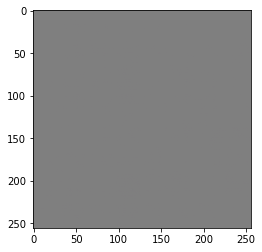

In [5]:
plt.imshow(image[0])

print(image.shape)

In [6]:
print(gan.discriminator.discriminator.predict(image))

[[0.49957293]]


In [7]:
names = ["../data/skyline_images/" + x for x in os.listdir("../data/skyline_images/") if ".jpg" in x][:1000]

In [8]:
tensor = getTrainingTensor(names,(256,256,3))

In [9]:
print(gan.discriminator.discriminator(tensor[:1]))

tf.Tensor([[0.49272436]], shape=(1, 1), dtype=float32)


In [10]:
gan.compile(loss="binary_crossentropy",optimizer=keras.optimizers.Adam(lr=0.0002, beta_1=0.5))#,run_eagerly=True)

In [11]:
if __name__ == "__main__":
    gan.predict(tensor[:5])

gan.summary()

Model: "image_gan"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 1)                 286732    
Total params: 286,732
Trainable params: 233,563
Non-trainable params: 53,169
_________________________________________________________________


In [12]:
data = getImageGenerator("../data/","skyline_images", dim, batchsize)
if __name__ == "__main__":
    gan.fit(data, epochs=1,batch_size=batchsize,)

Found 123121 images belonging to 1 classes.
(4,) (None, 256, 256, 3) (None, None, None, None) (16, 256, 256, 3)
Tensor("concat:0", shape=(4,), dtype=int32) 16 Tensor("discriminator/dense_1/Sigmoid:0", shape=(None, 1), dtype=float32)


ValueError: in user code:

    c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    D:\image_generator\src\imageGAN.py:102 train_step
        des_loss = computeLoss(y,self.discriminator.discriminator(X))
    D:\image_generator\src\imageGAN.py:71 computeLoss
        return tf.metrics.binary_crossentropy(y1,y2,from_logits=False)
    c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\losses.py:1608 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\keras\backend.py:4979 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    c:\users\ethan\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\ops\nn_impl.py:174 sigmoid_cross_entropy_with_logits
        (logits.get_shape(), labels.get_shape()))

    ValueError: logits and labels must have the same shape ((None, 1) vs (4,))


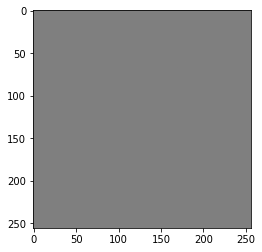

In [11]:
image = gan.generator.predict(noise)

plt.imshow(image[0])

In [13]:
gan.save_weights("tmp")

In [14]:

gan.generator.generator(gan.generator.sampleLatentSpace(5))

<tf.Tensor: shape=(5, 256, 256, 3), dtype=float32, numpy=
array([[[[0.49993187, 0.50003785, 0.50009406],
         [0.50011605, 0.49999648, 0.5000314 ],
         [0.50010586, 0.49998048, 0.5000307 ],
         ...,
         [0.4998916 , 0.500188  , 0.50018495],
         [0.49990284, 0.5002844 , 0.5000514 ],
         [0.5001042 , 0.500125  , 0.5003834 ]],

        [[0.4999471 , 0.500024  , 0.5000249 ],
         [0.49992737, 0.5001175 , 0.49996874],
         [0.4999319 , 0.50001484, 0.50003916],
         ...,
         [0.49996477, 0.5002633 , 0.5000669 ],
         [0.49986845, 0.49985167, 0.5000427 ],
         [0.4996948 , 0.5000318 , 0.49982318]],

        [[0.49999762, 0.49993297, 0.5000054 ],
         [0.49999416, 0.4997127 , 0.49998856],
         [0.4999655 , 0.4999282 , 0.5001355 ],
         ...,
         [0.5003052 , 0.4997659 , 0.5002116 ],
         [0.5000522 , 0.5000448 , 0.5003497 ],
         [0.50006866, 0.5000044 , 0.4998856 ]],

        ...,

        [[0.49981192, 0.49994245, 